##Hierarchical Clustering

Hierarchical clustering is an unsupervised machine learning algorithm used to group similar data points into clusters. It builds a hierarchy (tree-like structure) of clusters called a dendrogram.

##There are two main types:

##Agglomerative (Bottom-Up):
Each data point starts as its own cluster, and the algorithm repeatedly merges the closest clusters.

##Divisive (Top-Down): A
ll data points start in one cluster, and the algorithm splits them step by step.

Hierarchical clustering does not require specifying the number of clusters initially and is useful for understanding the data structure and relationships between points.

In [1]:
# Implementation
# Import all neccessary Libraries


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data

from sklearn.datasets import load_iris
data = load_iris()

In [3]:
# Generating data points

x = data.data
y = data.target

In [4]:
# scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)

In [5]:
# Reducing dimensions by applying PCA

from sklearn.decomposition import PCA
pca = PCA(n_components=2)


In [6]:
pca

PCA(n_components=2)

In [7]:
pca_scaled = pca.fit_transform(x_scaled)

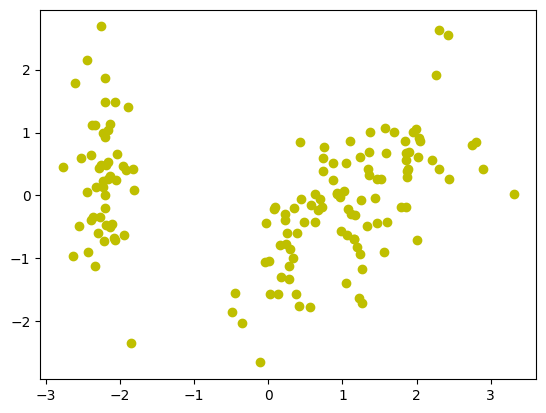

In [20]:
# Plot the graph

plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c = 'y',cmap='rainbow')

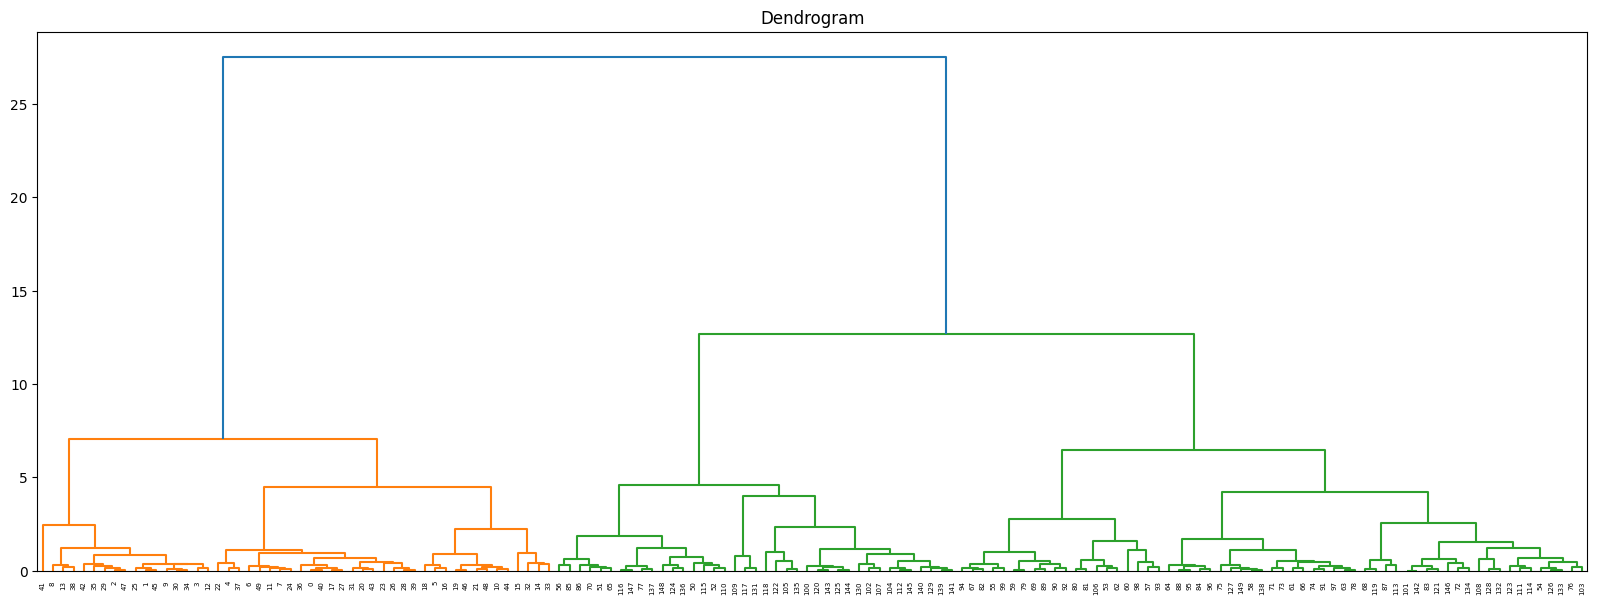

In [21]:
# Agglomerative clustering
# make dendograms

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,7))
plt.title('Dendrogram')
sch.dendrogram(sch.linkage(pca_scaled,method='ward'))
plt.show()

In [10]:
# Building the model

from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,linkage='ward')

In [12]:
cluster.fit_predict(pca_scaled)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [13]:
# Model Evaluation

from sklearn.metrics import silhouette_score



In [14]:
silhouette_coef = []
for k in range(2,11):
  agglo = AgglomerativeClustering(n_clusters=k,linkage='ward')
  agglo.fit(x_scaled)
  score = silhouette_score(x_scaled,agglo.labels_)
  silhouette_coef.append(score)
  silhouette_coef.append(score)
  silhouette_coef

In [15]:
 silhouette_coef

[np.float64(0.5770346019475988),
 np.float64(0.5770346019475988),
 np.float64(0.4466890410285909),
 np.float64(0.4466890410285909),
 np.float64(0.4006363159855973),
 np.float64(0.4006363159855973),
 np.float64(0.33058726295230545),
 np.float64(0.33058726295230545),
 np.float64(0.31485480100512825),
 np.float64(0.31485480100512825),
 np.float64(0.316969830299128),
 np.float64(0.316969830299128),
 np.float64(0.310946529007258),
 np.float64(0.310946529007258),
 np.float64(0.31143422475471655),
 np.float64(0.31143422475471655),
 np.float64(0.3161120375980681),
 np.float64(0.3161120375980681)]

##Conclusion

In this implementation, Hierarchical Clustering was used to group similar data points based on distance measures. The dendrogram helped visualize how clusters were formed step by step, making it easier to understand the hierarchical relationships in the dataset.

After applying feature scaling and selecting an appropriate linkage method, the optimal number of clusters was determined using visual inspection and evaluation metrics such as the Silhouette Score. The final clustering results showed meaningful groupings within the data.

Overall, Hierarchical Clustering is effective for small to medium-sized datasets and provides strong interpretability through dendrogram visualization. However, it can be computationally expensive for large datasets.